In [1]:
#Initialize, import, and format
import numpy as np
import pandas as pd
from numpy.random import normal, multivariate_normal

import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.decomposition import PCA
from scipy import stats


DATA_DIRECTORY = "C:\\Users\\WDAmo\\GitHub\\font_analysis\\metrics.csv"
PARAM_LABELS = ["unit", "pen", "cap", "bar", "asc", "desc", "xht", "horz",
                "vert", "cont", "supr", "slnt", "aprt", "crnr", "over", "tapr"]
PARAM_NAMES = ["Unit Width", "Pen Width", "Cap Height", "Bar Height", "Ascender Height", "Descender Height", "X-Height",
              "Horizontal Increase", "Vertical Increase", "Contrast", "Superness", "Slanting", "Aperture", "Corner",
              "Overshoot", "Taper"]

def extract_data():
    df = pd.read_csv(DATA_DIRECTORY)
    return df.drop(columns=['Timestamp'])
dataset = extract_data()

In [2]:
dataset = dataset.to_numpy()
# dataset = np.delete(dataset, 0,0)

In [3]:
means = np.mean(dataset, 0)
means

array([7.7826087 , 3.08695652, 8.13043478, 7.43478261, 8.69565217,
       3.2173913 , 4.43478261, 8.08695652, 4.69565217, 5.91304348])

In [4]:
stds = np.std(dataset, 0)
stds

array([1.69286281, 1.41153766, 1.5688364 , 1.71505069, 1.19545453,
       2.28333322, 1.76502462, 1.71725371, 1.33301824, 1.81570548])

In [9]:
labels = np.array(["Georgia", "Impact", "Arial", "Bespoke", "Avenir", "Papyrus", "Bespoke Major", "Calibri", "Bespoke Minor", "Courier New"])
idx = [0, 4, 7, 2, 9, 5, 1, 3, 6, 8]
labels2 = labels[idx]
means2 = means[idx]
stds2 = stds[idx]
errs = stds2 / np.sqrt(23)

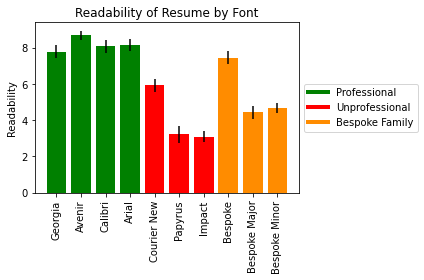

In [12]:

fig, ax = plt.subplots()
from matplotlib.lines import Line2D


ax.bar(labels2, means2, yerr=errs, color=['green','green','green','green', 'red', 'red', 'red',  
                              'darkorange', 'darkorange', 'darkorange'])
plt.xticks(rotation = 90)

custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='darkorange', lw=4)]
ax.legend(custom_lines, ['Professional', 'Unprofessional', 'Bespoke Family'], loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylabel('Readability')
ax.set_title('Readability of Resume by Font')

plt.tight_layout()

plt.savefig('metrics.pdf')

In [42]:
arr = np.array([10, 20, 30, 40, 50])
idx = [1, 0, 3, 4, 2]
arr[idx]

array([20, 10, 40, 50, 30])